<a href="https://colab.research.google.com/github/Niashr/GoogleColab/blob/master/Test_transferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import random
import cv2

from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
from shutil import copyfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, BatchNormalization, Dropout, Dense, GlobalAveragePooling2D,Flatten
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
tf.__version__

'2.3.0'

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive/ImageClassification

ln: failed to create symbolic link '/mydrive/My Drive': File exists
Image_InCeption_ResNet_V2.h5  Test  Train


In [ ]:
PATH = '/mydrive/ImageClassification'

In [ ]:


Clear_dir = os.path.join(PATH, 'Train/Clear')
Distortion_dir = os.path.join(PATH, 'Train/distorted')
print(Clear_dir)
print(Distortion_dir)

/mydrive/ImageClassification/Train/Clear
/mydrive/ImageClassification/Train/distorted


In [ ]:
def show_img(path):
    images = list()
    for img in random.sample(os.listdir(path),9):
        images.append(img)
    i = 0
    fig,ax = plt.subplots(nrows=3, ncols=3, figsize=(30,20))
    for row in range(3):
        for col in range(3):
            ax[row,col].imshow(cv2.cvtColor(cv2.imread(os.path.join(path,images[i])), cv2.COLOR_BGR2RGB))
            i+=1

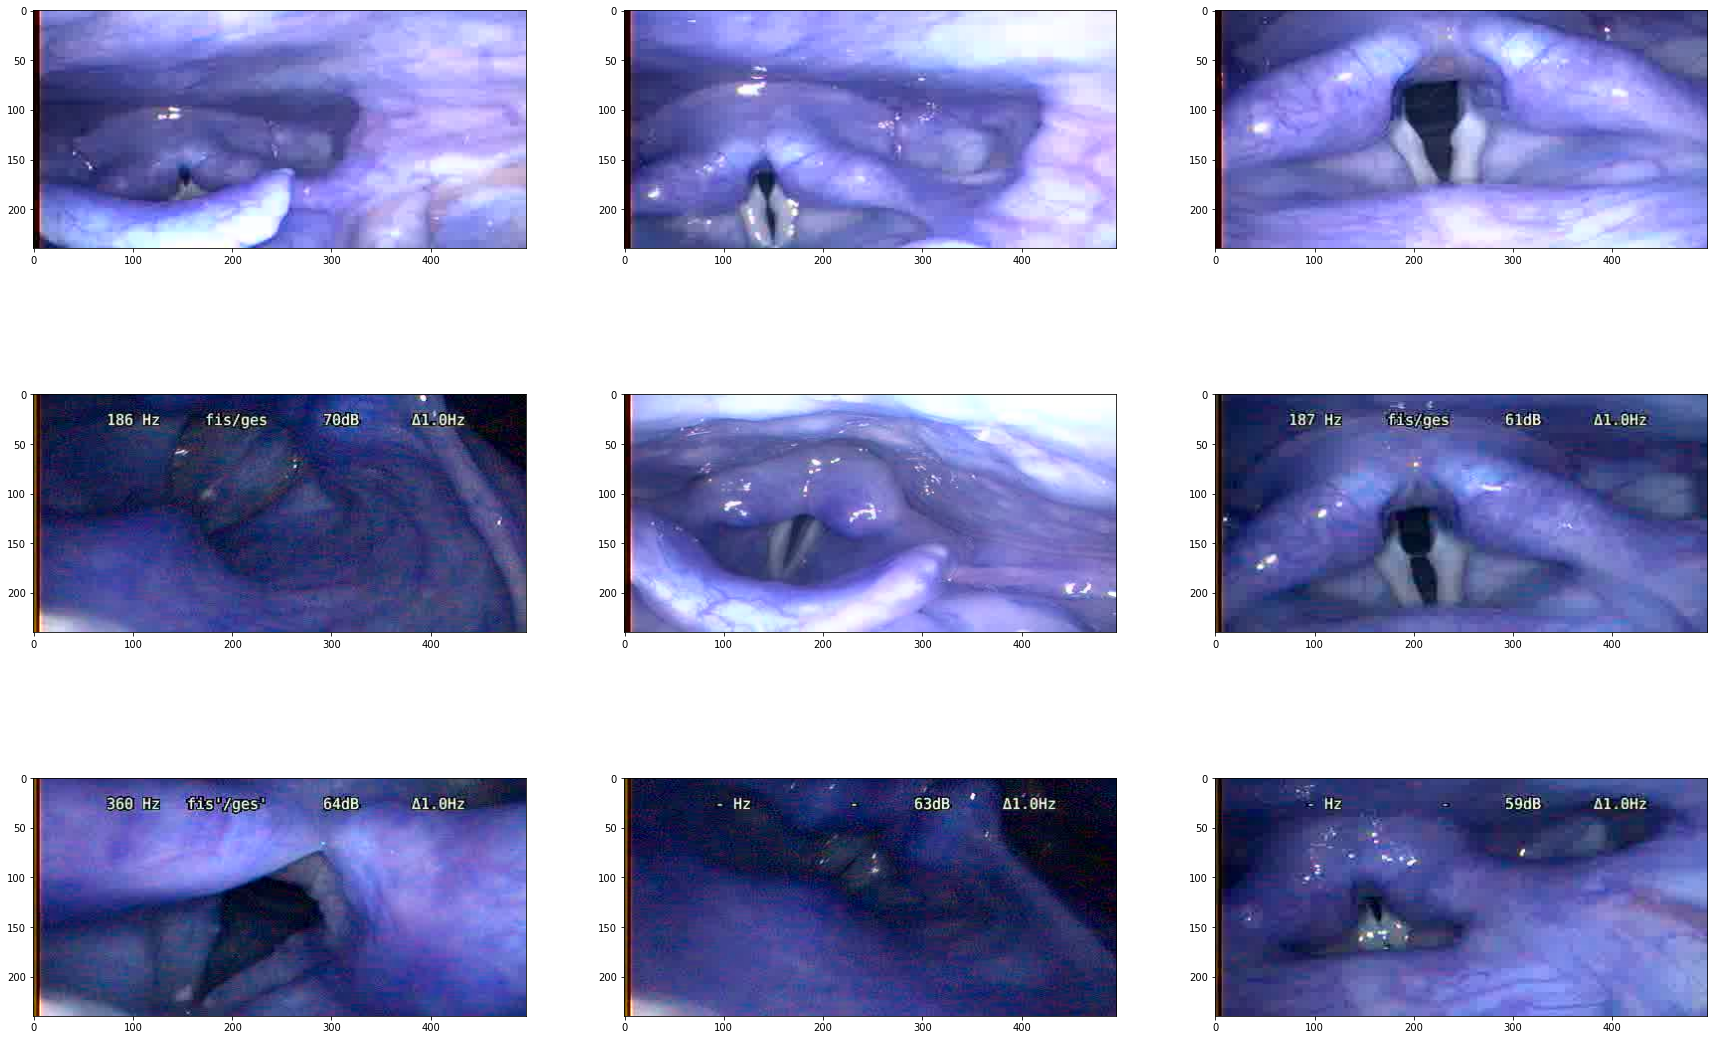

In [ ]:
show_img(Clear_dir)

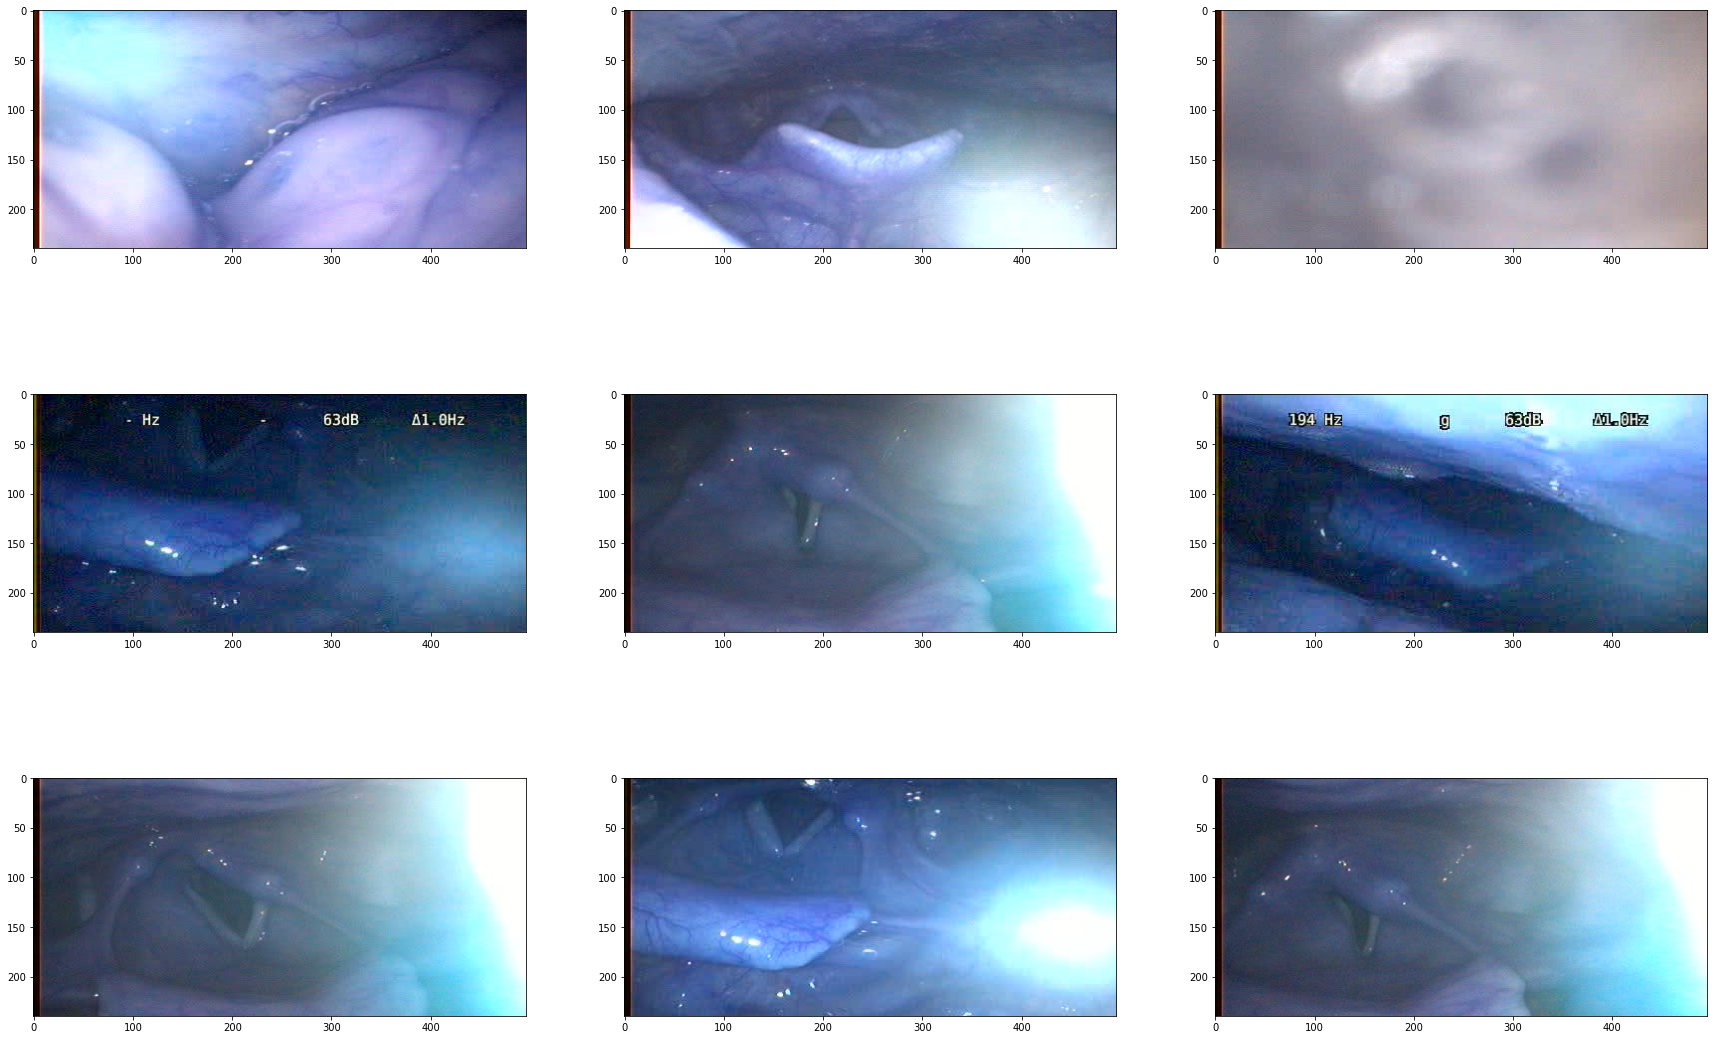

In [ ]:
show_img(Distortion_dir)

In [ ]:
Test_Path = os.path.join(PATH, 'Test')
Test_Clear_Path = os.path.join(Test_Path, 'Clear')
Test_Dist_Path = os.path.join(Test_Path, 'Distorted')
# os.mkdir(Test_Path)
# os.mkdir(Test_Clear_Path)
# os.mkdir(Test_Dist_Path)
print(Test_Path)
print(Test_Clear_Path)
print(Test_Dist_Path)

/mydrive/ImageClassification/Test
/mydrive/ImageClassification/Test/Clear
/mydrive/ImageClassification/Test/Distorted


In [ ]:
import shutil
from shutil import copyfile

In [ ]:
def Test_data(src,dst):
    dataSplit = int(np.ceil(len(os.listdir(src))*0.02))
    for img in os.listdir(src)[-dataSplit:]:
      print(img)      
      print(os.path.join(src,img))
      print(os.path.join(dst,img))
      shutil.move(os.path.join(src,img), os.path.join(dst,img))


In [ ]:
# Test_data(Clear_dir,Test_Clear_Path)
# Test_data(Distortion_dir,Test_Dist_Path)

In [ ]:
len(os.listdir(Clear_dir)), len(os.listdir(Distortion_dir))

(618, 618)

In [ ]:
print(Test_Path)

/mydrive/ImageClassification/Test


In [ ]:
len(os.listdir(os.path.join(Test_Path,'Clear'))), len(os.listdir(os.path.join(Test_Path,'Distorted')))

(13, 13)

In [ ]:
# train_dataset.class_indices.keys()
# # print(array(train_dataset.class_indices.keys()))
# for key in train_dataset.class_indices.keys():
#   print(key)

In [ ]:
# class_names = ['C','D']

# plt.figure(figsize=(10, 10))
# for images, labels in train_dataset.next():
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   #vertical_flip=True,
                                   rotation_range=20,  
                                   zoom_range=0.15,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   validation_split = 0.1)


test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
batch_size = 64
IMG_SIZE = (224,224)

train_dataset = train_datagen.flow_from_directory(
                PATH,
                target_size = IMG_SIZE,
                class_mode = 'binary',
                batch_size = batch_size,
                shuffle = True
                )

validation_dataset = train_datagen.flow_from_directory(
                PATH,
                target_size = IMG_SIZE,
                class_mode = 'binary',
                batch_size = batch_size,
                shuffle = True
                )                

test_dataset = test_datagen.flow_from_directory(
                Test_Path,
                target_size = IMG_SIZE,
                class_mode = 'binary',
                batch_size = batch_size,
                shuffle = True
                )

Found 1262 images belonging to 2 classes.
Found 1262 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [ ]:
# [test_dataset.class_indices]

test_dataset.labels



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)

In [ ]:
# class_names = ['C','D']

# plt.figure(figsize=(10, 10))
# for images, labels in train_dataset.next:
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

In [ ]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.InceptionResNetV2(
    include_top=False, weights='imagenet', input_shape=IMG_SHAPE)

In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_203 (Conv2D)             (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_206 (BatchN (None, 111, 111, 32) 96          conv2d_203[0][0]                 
__________________________________________________________________________________________________
activation_203 (Activation)     (None, 111, 111, 32) 0           batch_normalization_206[0][0]    
________________________________________________________________________________

In [ ]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 5, 5, 1536)        54336736  
_________________________________________________________________
flatten_2 (Flatten)          (None, 38400)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               19661312  
_________________________________________________________________
batch_normalization_412 (Bat (None, 512)               2048      
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_413 (Bat (None, 256)              

In [ ]:
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

checkpoint = ModelCheckpoint('/mydrive/ImageClassification/Image_InCeption_ResNet_V2.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=10,
                          verbose=1,restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.0001)
callbacks = [earlystop,checkpoint,learning_rate_reduction]

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
epochs = 35

history = model.fit(
            train_dataset,
            steps_per_epoch=10,
            epochs=epochs,
            callbacks=callbacks,
            validation_data=validation_dataset,
            )

Epoch 1/15
10/10 [==============================] - ETA: 0s - loss: 0.9420 - accuracy: 0.5402
Epoch 00001: val_loss improved from inf to 7.13169, saving model to /mydrive/ImageClassification/Image_InCeption_ResNet_V2.h5
10/10 [==============================] - 34s 3s/step - loss: 0.9420 - accuracy: 0.5402 - val_loss: 7.1317 - val_accuracy: 0.0404
Epoch 2/15
10/10 [==============================] - ETA: 0s - loss: 0.7987 - accuracy: 0.5672
Epoch 00002: val_loss improved from 7.13169 to 5.50547, saving model to /mydrive/ImageClassification/Image_InCeption_ResNet_V2.h5
10/10 [==============================] - 31s 3s/step - loss: 0.7987 - accuracy: 0.5672 - val_loss: 5.5055 - val_accuracy: 0.0460
Epoch 3/15
10/10 [==============================] - ETA: 0s - loss: 0.7620 - accuracy: 0.5788
Epoch 00003: val_loss improved from 5.50547 to 3.75008, saving model to /mydrive/ImageClassification/Image_InCeption_ResNet_V2.h5
10/10 [==============================] - 31s 3s/step - loss: 0.7620 - accu

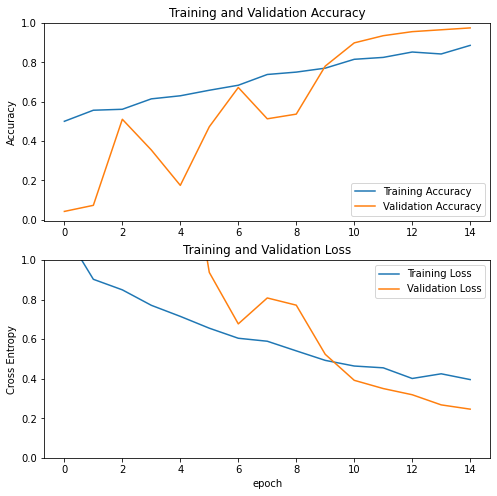

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

1/1 [==============================] - 0s 2ms/step - loss: 0.3716 - accuracy: 0.8846
Test accuracy : 0.8846153616905212


In [ ]:
image_batch, label_batch = test_dataset.next()
# print(image_batch)
predictions = model.predict_on_batch(image_batch).flatten()

Predictions:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Labels:
 [[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


NameError: ignored

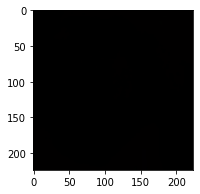

In [ ]:
# print(predictions)
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

Predictions:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Labels:
 [[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


NameError: ignored

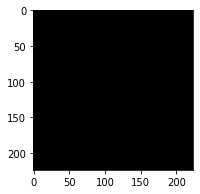

In [ ]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")